Timestamp $\Delta t = 200 M$, this notebook runs from 0 to 200M <br>
Do the var(Te) [two versions: 1) calculated from error propagation and 2) directly calculated] VS theta ([0, pi]) plots at different radius (i.e. different index slices of that (288, 128, 128) array). Say, radius r=2, then choose the slice varTe[2, 0, :] (following ($r, \phi, \theta$)) so that you got a 1D var(Te) at radius r=2 along theta

In [1]:
import warnings

from matplotlib import pyplot as plt
import numpy as np

import pyharm
from pyharm.plots import plot_dumps as pplt

import h5py

In [2]:
# some constants
cl = 29979245800.0 # speed of light in cgs
mp = 1.67262171e-24
kb = 1.3806505e-16
mu = 1.

check file radius range

In [3]:
i0 = 5010 # initial  frame
i1 = 5051 # 1 + last frame
fmt = 'torus.out0.{:05d}.h5'

def fname(i, src): # closure on `src` and `fmt`
    return (src+fmt).format(i)

In [4]:
src_ma_5M = '/xdisk/chanc/proj/eht/GRMHD_dt5M/Ma+0.94_w5/'
src_sa_5M = '/xdisk/chanc/proj/eht/GRMHD_dt5M/Sa+0.94_w5/'

src_ma_500M = '/xdisk/chanc/proj/eht/GRMHD_dt500M/Ma+0.94_w5/'
src_sa_500M = '/xdisk/chanc/proj/eht/GRMHD_dt500M/Sa+0.94_w5/'

In [5]:
# ma_ files
with h5py.File(fname(i0, src_ma_5M), 'r') as file:
    header1 = 'header/r_in'
    dataset1 = file[header1]
    print(f"Dataset associated with {header1}:")
    print(dataset1[()])
    
    header2 = 'header/r_out'
    dataset2 = file[header2]
    print(f"Dataset associated with {header2}:")
    print(dataset2[()])
    
    header3 = 'header/r_eh'
    dataset3 = file[header3]
    print(f"Dataset associated with {header3}:")
    print(dataset3[()])
    
    header4 = 'header/coordinates'
    dataset4 = file[header4]
    print(f"Dataset associated with {header4}:")
    print(dataset4[()])

Dataset associated with header/r_in:
1.1852307523849355
Dataset associated with header/r_out:
1000
Dataset associated with header/r_eh:
1.3479852726768764
Dataset associated with header/coordinates:
b'FMKS'


In [6]:
# sa_ files
with h5py.File(fname(i0, src_sa_5M), 'r') as file:
    header1 = 'header/r_in'
    dataset1 = file[header1]
    print(f"Dataset associated with {header1}:")
    print(dataset1[()])
    
    header2 = 'header/r_out'
    dataset2 = file[header2]
    print(f"Dataset associated with {header2}:")
    print(dataset2[()])
    
    header3 = 'header/r_eh'
    dataset3 = file[header3]
    print(f"Dataset associated with {header3}:")
    print(dataset3[()])

Dataset associated with header/r_in:
1.1852307523849355
Dataset associated with header/r_out:
1000
Dataset associated with header/r_eh:
1.3479852726768764


<h3>MAD</h3>

<h5>Rh=1</h5>

In [7]:
# the var(Te) directly calculated
varTe_file = np.load('ma_rh1_varTe.npy', allow_pickle=True)
avgTe = np.load("ma_rh1_avgTe.npy", allow_pickle=True)

In [8]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('ma_varPg.npy', allow_pickle=True)
varRHO_file = np.load('ma_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('ma_varbsq.npy', allow_pickle=True)

# averages
ma_avg_Pg = np.load('ma_avgPg.npy', allow_pickle=True)
ma_avg_RHO = np.load('ma_avgRHO.npy', allow_pickle=True)
ma_avg_bsq = np.load('ma_avgbsq.npy', allow_pickle=True)

ma_avgPgRHO = np.load('ma_avgRHOPg.npy', allow_pickle=True)
ma_avgPgbsq = np.load('ma_avgBsqPg.npy', allow_pickle=True)
ma_avgRHObsq = np.load('ma_avgBsqRHO.npy', allow_pickle=True)

In [9]:
# covariances
ma_covPgRHO = ma_avgPgRHO - ma_avg_Pg * ma_avg_RHO
ma_covPgbsq = ma_avgPgbsq - ma_avg_Pg * ma_avg_bsq
ma_covRHObsq = ma_avgRHObsq - ma_avg_RHO * ma_avg_bsq

In [10]:
# standard deviations
maPg_std = varPg_file**1/2
maRHO_std = varRHO_file**1/2
mabsq_std = varbsq_file**1/2

In [11]:
# coefficients
ma_CPg1 = np.load('ma_CPg1.npy')
ma_Crho1 = np.load('ma_Crho1.npy')
ma_Cbsq1 = np.load('ma_Cbsq1.npy')

$a = y(\gamma_{i} - 1)$ <br>
$b = z(\gamma_{e} - 1)$ <br>
$c = \frac{m_{p}(\gamma_{i} - 1)(\gamma_{e}-1)}{k_{B}(\gamma - 1)}$ <br>
$Te = \frac{m_{p}u(\gamma_{e}-1)(\gamma_{i}-1)}{k\rho (y(\gamma_{i}-1)+Rz(\gamma_{e}-1))}=c\frac{P_{g}}{\rho(a+bR)}$<br>
$C[Pg -> Te] = A = \frac{<Te>}{<Pg>}-\frac{2b<Te><Pg>(R_{h} - <R>)}{(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
$C[\rho -> Te] = B = -\frac{<Te>}{<\rho>}$ <br>
$C[B^{2} -> Te] = C = \frac{b<Te><Pg>}{2\mu_{0}(<P_{mag}>^{2}+<Pg>^{2})(a+b<R>)}$ <br>
Recall: <br>
$cov(X, Y) = <XY> - <X><Y>$ <br>
dimensionless covariance: $\frac{cov(X, Y)}{\sigma_{X}\sigma_{Y}}$ <br>
var(Te) = $(\delta Te)^{2}$ = $A^{2}$var(Pg) + $B^{2}$var($\rho$) + $C^{2}$var(bsq) + 2$AB$cov(Pg, $\rho$) + 2$AC$ cov(Pg, bsq) + 2$BC$ cov($\rho$, bsq) <br>
**With dimensionless form:** <br> 
$\frac{var(Te)}{<Te>^{2}} = \frac{A^{2}}{<Te>^{2}}\frac{var(Pg)}{<Pg>^{2}} + \frac{B^{2}}{<Te>^{2}}\frac{var(\rho)}{<\rho>^{2}} + \frac{C^{2}}{<Te>^{2}}\frac{var(bsq)}{<bsq>^{2}} + 2\frac{AB}{<Te>^{2}}\frac{cov(Pg, \rho)}{std(Pg)std(\rho)} + 2\frac{AC}{<Te>^{2}}\frac{cov(Pg, bsq)}{std(Pg)std(bsq)} + 2\frac{BC}{<Te>^{2}}\frac{cov(\rho, bsq)}{std(\rho)std(bsq)}$ <br>
and now the variance terms become dimensionless, so are the coefficient terms

In [12]:
# with dimension, var(Te) caculated from coefficients and variances
varTe_coeff = np.square(ma_CPg1)*varPg_file + np.square(ma_Crho1)*varRHO_file + np.square(ma_Cbsq1)*varbsq_file + \
            2*ma_CPg1*ma_Crho1*ma_covPgRHO + 2*ma_CPg1*ma_Cbsq1*ma_covPgbsq + 2*ma_Crho1*ma_Cbsq1*ma_covRHObsq

In [13]:
varTe_coeff

array([[[1.09506498e+22, 1.04071005e+22, 9.68247128e+21, ...,
         1.00542402e+22, 9.79153632e+21, 1.12872482e+22],
        [6.81633691e+21, 5.76686535e+21, 4.32626904e+21, ...,
         5.33595670e+21, 6.17495637e+21, 7.13512060e+21],
        [1.97742942e+22, 1.83610228e+22, 1.54701373e+22, ...,
         1.80693660e+22, 2.05921057e+22, 2.05119616e+22],
        ...,
        [2.07756705e+22, 2.57118890e+22, 2.27664073e+22, ...,
         1.80633718e+22, 1.91608215e+22, 1.86673057e+22],
        [4.30817681e+21, 4.16799647e+21, 4.53671502e+21, ...,
         7.84388040e+21, 6.26161453e+21, 4.86405663e+21],
        [1.57144697e+22, 1.28308457e+22, 1.10804949e+22, ...,
         1.97804635e+22, 1.79789077e+22, 1.74630445e+22]],

       [[1.61606088e+22, 1.61694646e+22, 1.41616963e+22, ...,
         1.47306962e+22, 1.40957930e+22, 1.55419077e+22],
        [1.27260073e+22, 9.01667416e+21, 6.51411517e+21, ...,
         9.43152033e+21, 9.18132881e+21, 1.21768779e+22],
        [1.94552082e+22, 

In [14]:
varTe_file

array([[[1.03307531e+22, 9.59489767e+21, 8.97971798e+21, ...,
         9.69158436e+21, 9.53630782e+21, 1.10374333e+22],
        [6.99398270e+21, 5.67227738e+21, 4.16023777e+21, ...,
         5.53396092e+21, 6.26557493e+21, 7.32337271e+21],
        [1.96069033e+22, 1.80792574e+22, 1.54185368e+22, ...,
         1.79353980e+22, 2.06240251e+22, 2.05680149e+22],
        ...,
        [2.20593512e+22, 2.67640441e+22, 2.29057119e+22, ...,
         1.86381657e+22, 1.94861690e+22, 1.94252536e+22],
        [4.34826833e+21, 4.12514671e+21, 4.41137439e+21, ...,
         7.82474332e+21, 6.32459538e+21, 4.96361407e+21],
        [1.50357963e+22, 1.23297971e+22, 1.07640540e+22, ...,
         1.94333217e+22, 1.74873299e+22, 1.68800646e+22]],

       [[1.45542214e+22, 1.43568525e+22, 1.26462276e+22, ...,
         1.38153930e+22, 1.32666021e+22, 1.45182950e+22],
        [1.29279520e+22, 8.80130456e+21, 6.15378048e+21, ...,
         9.92610407e+21, 9.54682388e+21, 1.24620401e+22],
        [1.90848397e+22, 

In [ ]:
# dimensionless, var(Te) caculated from coefficients and variances
varTe_coeff = (ma_CPg1**2/avgTe**2)*(varPg_file/ma_avg_Pg**2) + (ma_Crho1**2/avgTe**2)*(varRHO_file/ma_avg_RHO**2) + \
            (ma_Cbsq1**2/avgTe**2)*(varbsq_file/ma_avg_bsq**2) + 2*(ma_CPg1*ma_Crho1/avgTe**2)*(ma_covPgRHO/(maPg_std*maRHO_std)) + \
            2*(ma_CPg1*ma_Cbsq1/avgTe**2)*(ma_covPgbsq/(maPg_std*mabsq_std)) + 2*(ma_Crho1*ma_Cbsq1/avgTe**2)*(ma_covRHObsq/(maRHO_std*mabsq_std))

Try: r = 2, 5, 8

In [15]:
def comparison_plot(r, varTe_exp, varTe_calc):
    varTe_true = varTe_exp[r, 0, :]
    varTe_coeff = varTe_calc[r, 0, :]

    # x axis: theta
    theta = np.linspace(0, np.pi, 128)

    plt.plot(theta, varTe_true, label='expected (at r=%r)'%r)
    plt.plot(theta, varTe_coeff, label='calculated (at r=%r)'%r)
    plt.xlabel('theta')
    plt.ylabel('var(Te)')
    plt.legend()
    plt.title('Comparison Between Calculated and Expected var(Te)', y=1.1)
    plt.show()

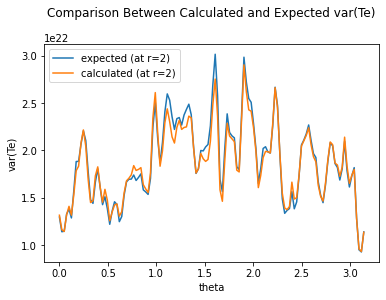

In [16]:
comparison_plot(2, varTe_file, varTe_coeff)

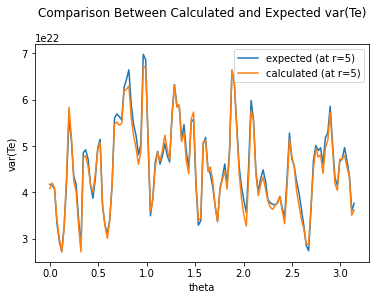

In [17]:
comparison_plot(5, varTe_file, varTe_coeff)

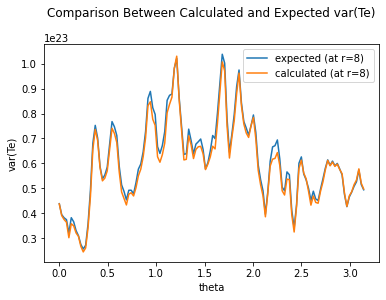

In [18]:
comparison_plot(8, varTe_file, varTe_coeff)

Try: middle and last few slices

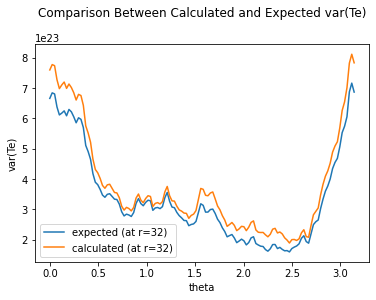

In [19]:
comparison_plot(32, varTe_file, varTe_coeff)

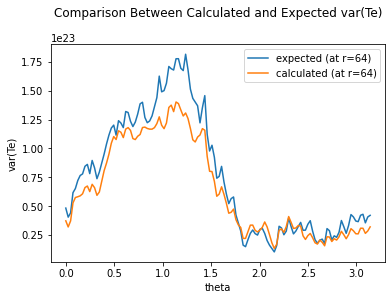

In [20]:
comparison_plot(64, varTe_file, varTe_coeff)

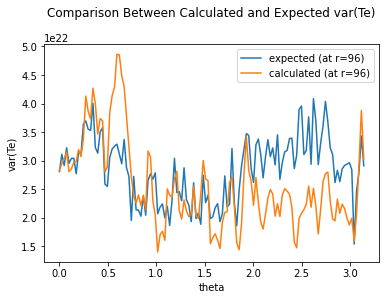

In [21]:
comparison_plot(96, varTe_file, varTe_coeff)

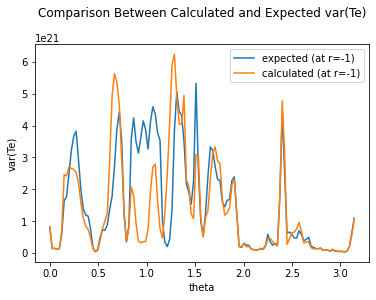

In [22]:
comparison_plot(-1, varTe_file, varTe_coeff)

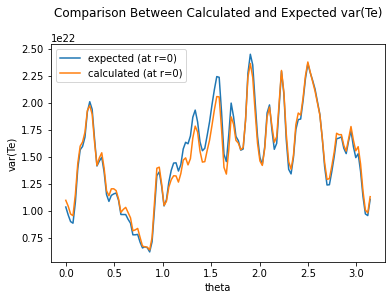

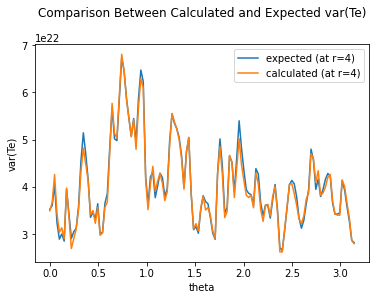

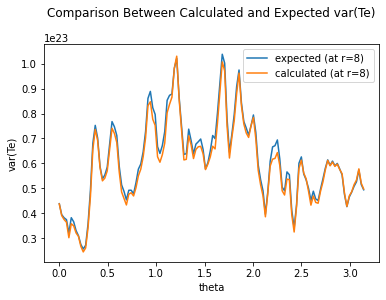

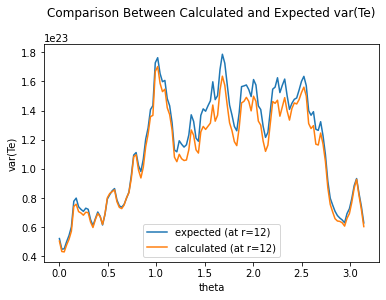

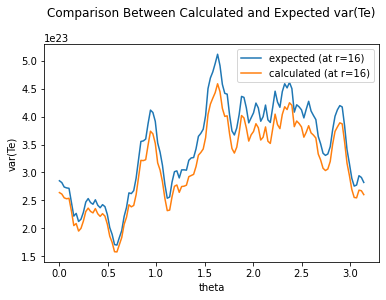

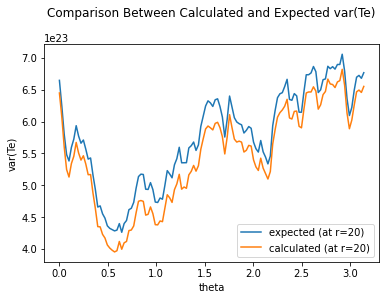

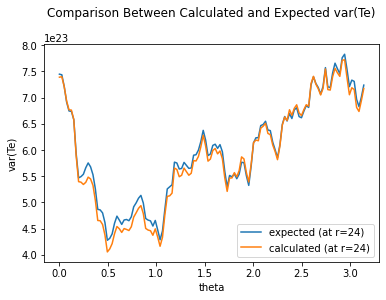

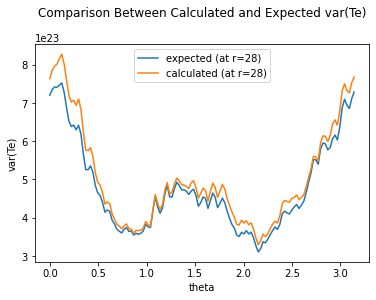

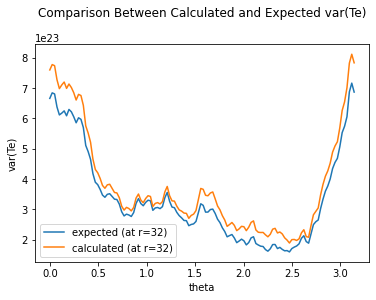

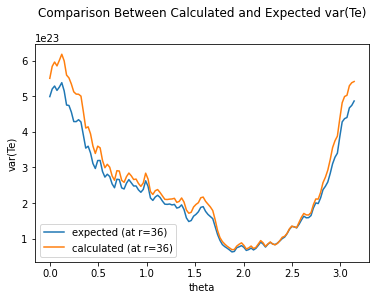

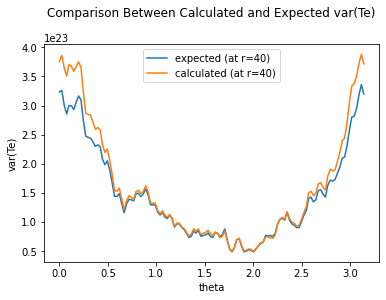

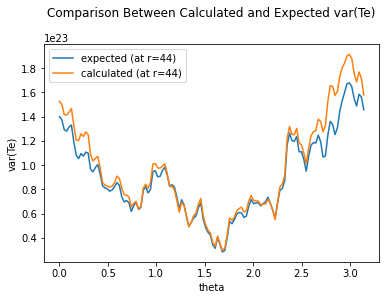

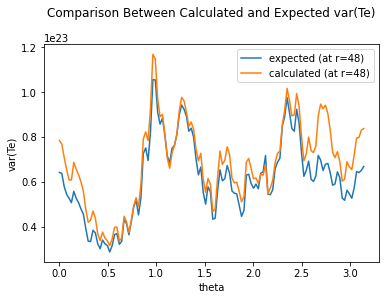

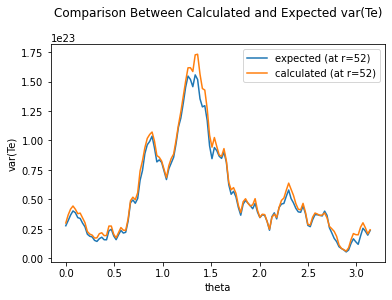

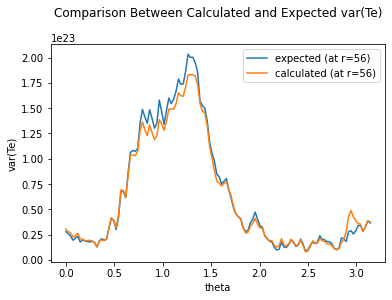

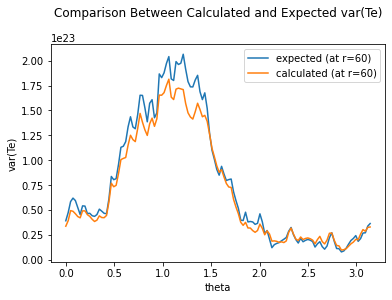

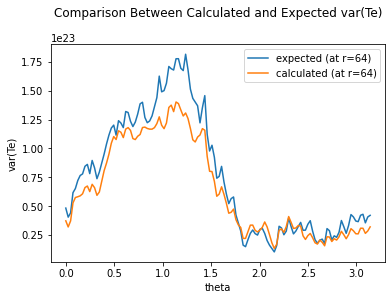

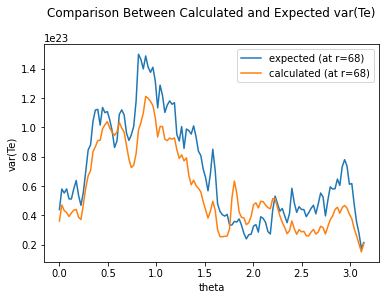

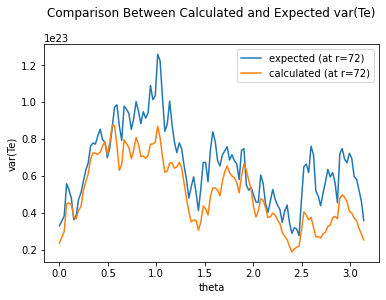

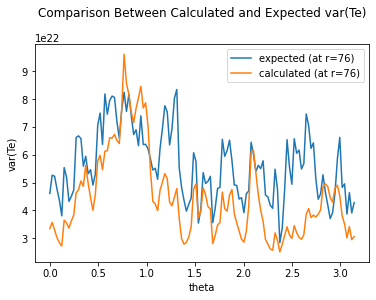

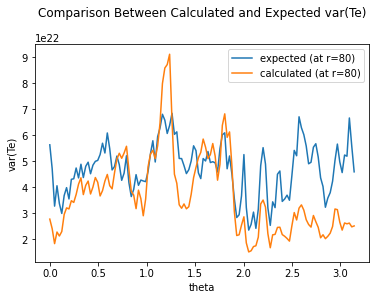

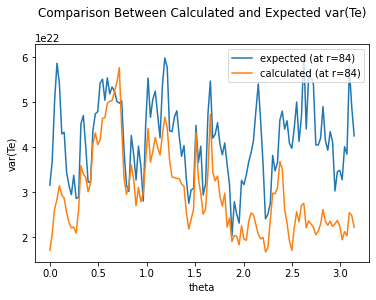

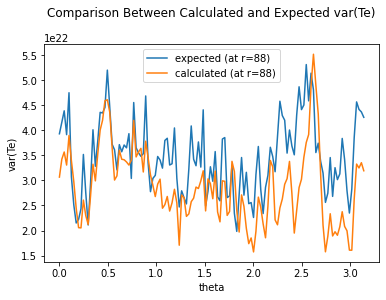

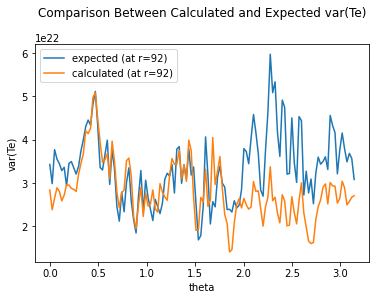

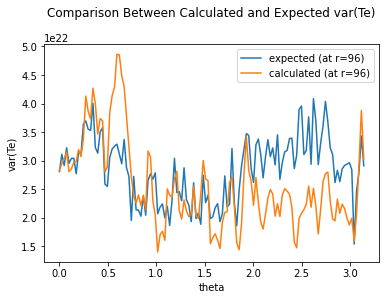

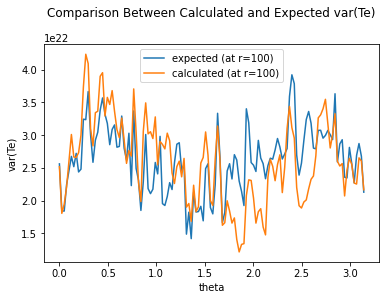

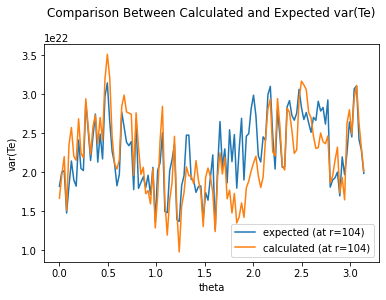

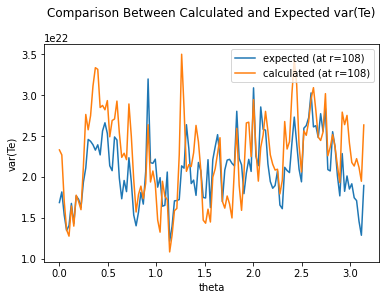

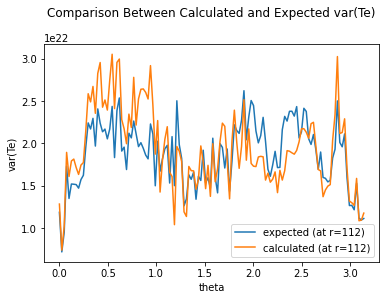

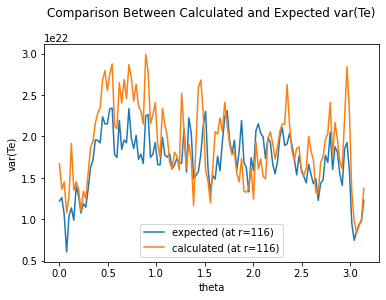

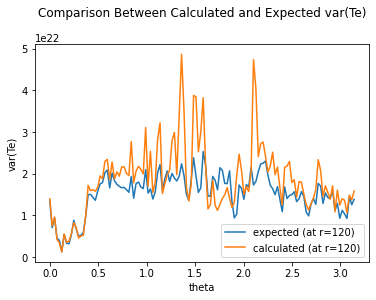

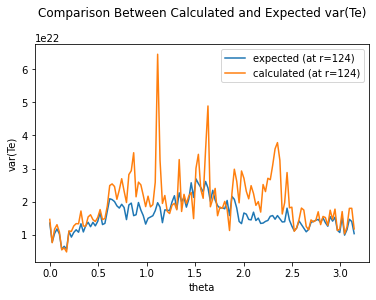

In [23]:
for r in range(0, 128, 4):
    comparison_plot(r, varTe_file, varTe_coeff)

<h5>Rh=160</h5>

In [24]:
# the var(Te) directly calculated from the equation
varTe_rh160 = np.load('ma_rh160_varTe.npy', allow_pickle=True)

In [25]:
# coefficients for MAD Rh=160
ma_CPg160 = np.load('ma_CPg160.npy')
ma_Crho160 = np.load('ma_Crho160.npy')
ma_Cbsq160 = np.load('ma_Cbsq160.npy')

In [26]:
# var(Te) caculated from coefficients and variances
varTe_coeff_rh160 = np.square(ma_CPg160)*varPg_file + np.square(ma_Crho160)*varRHO_file + np.square(ma_Cbsq160)*varbsq_file + \
            2*ma_CPg160*ma_Crho160*ma_covPgRHO + 2*ma_CPg160*ma_Cbsq160*ma_covPgbsq + 2*ma_Crho160*ma_Cbsq160*ma_covRHObsq

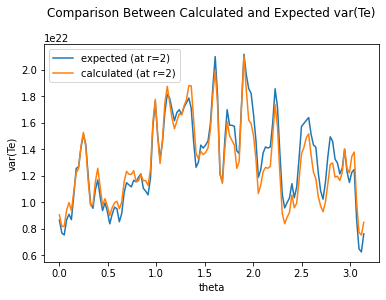

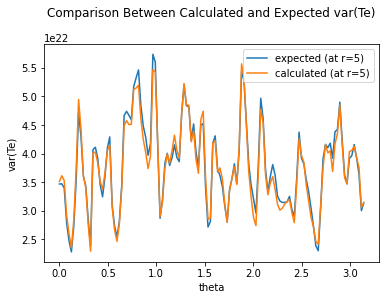

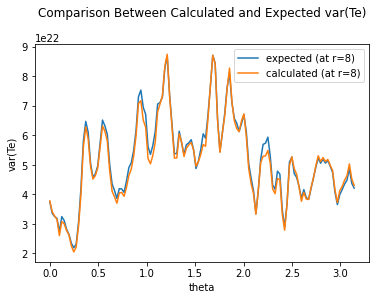

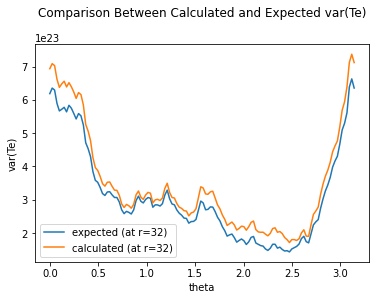

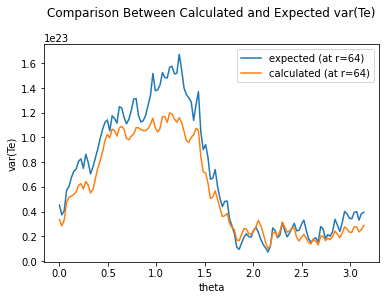

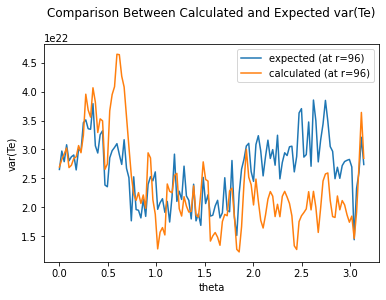

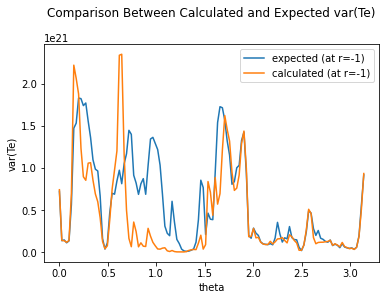

In [27]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_rh160, varTe_coeff_rh160)

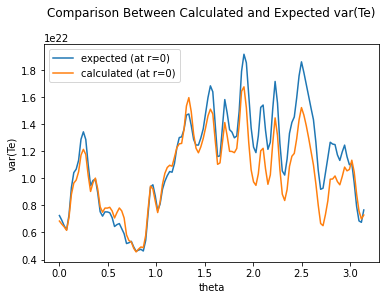

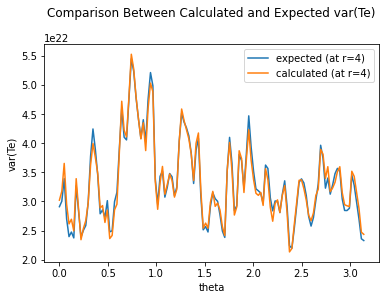

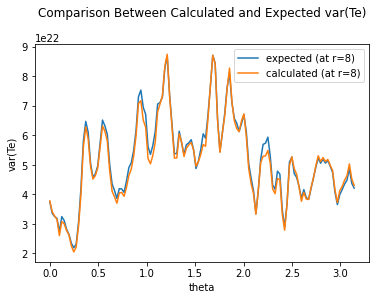

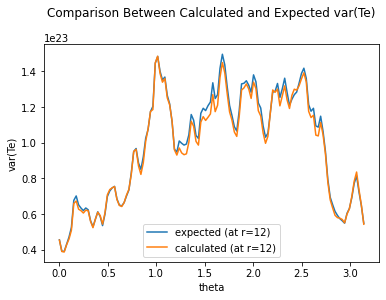

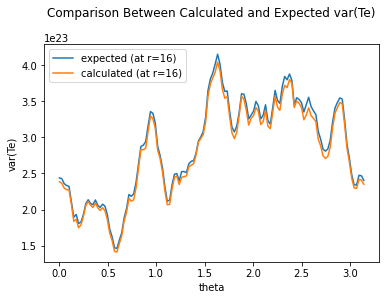

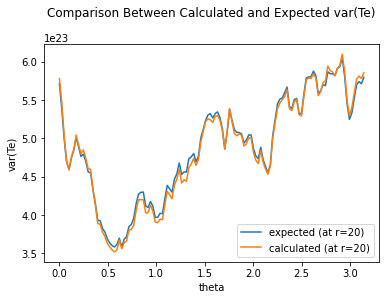

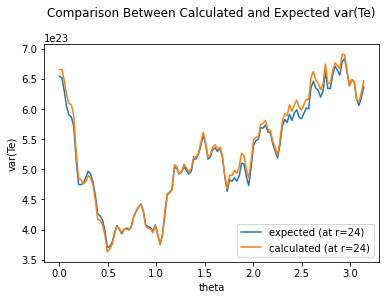

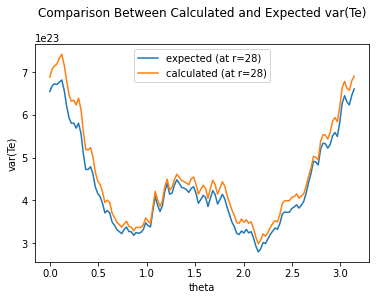

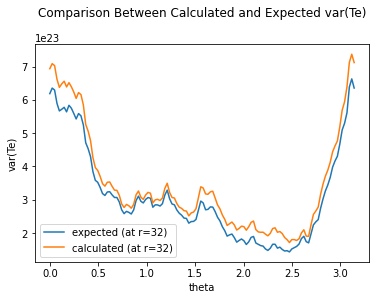

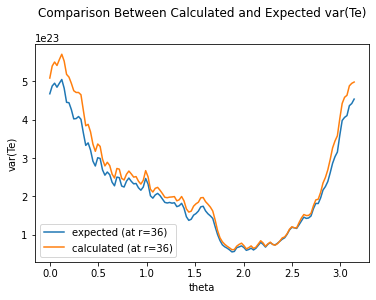

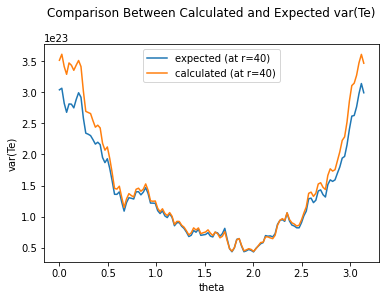

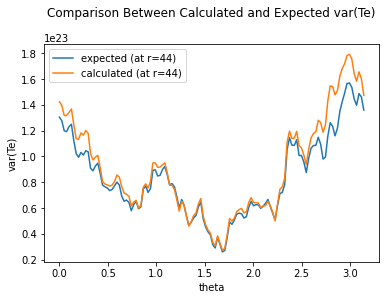

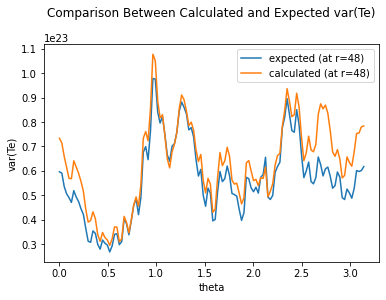

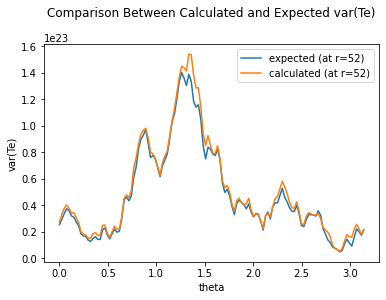

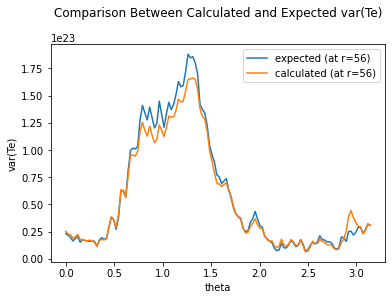

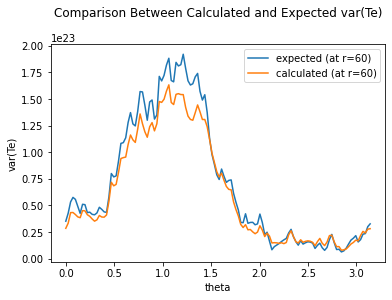

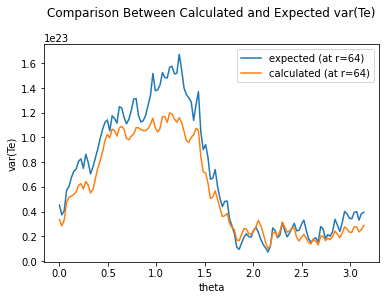

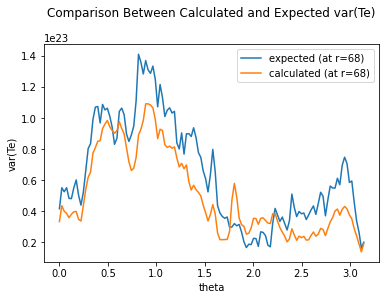

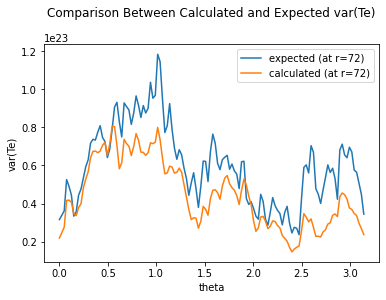

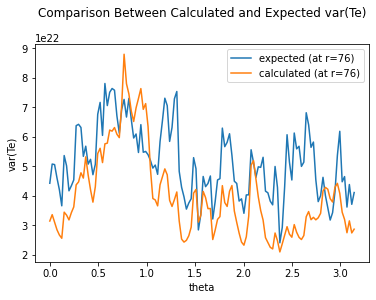

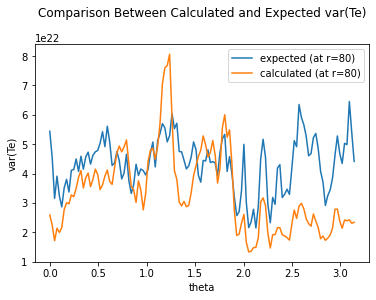

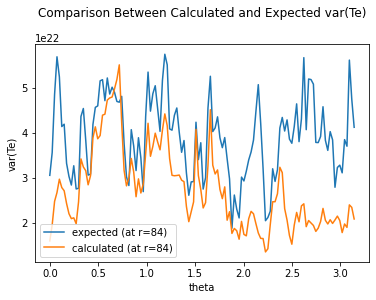

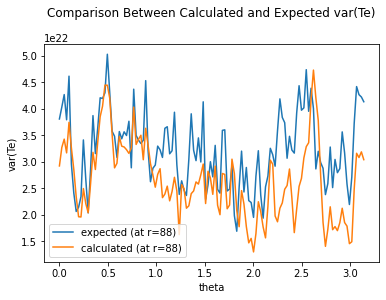

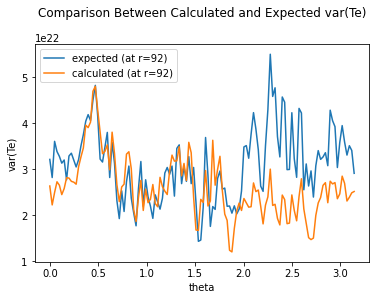

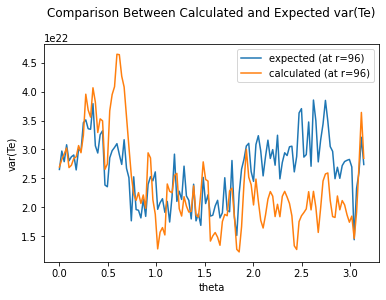

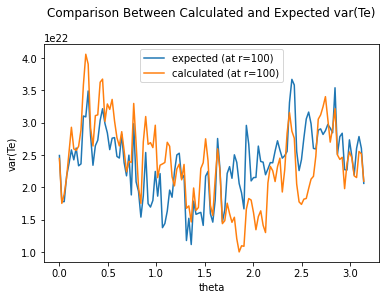

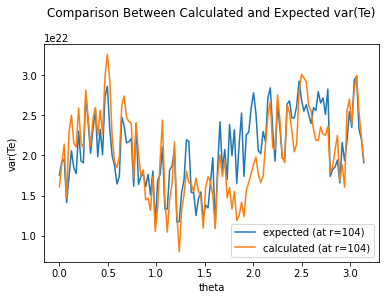

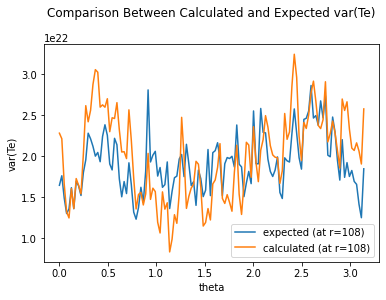

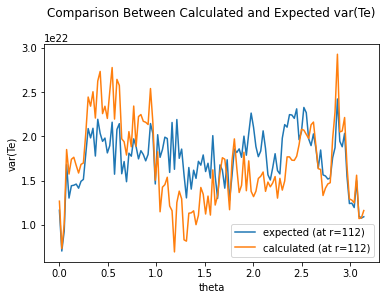

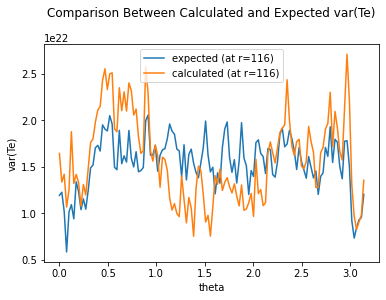

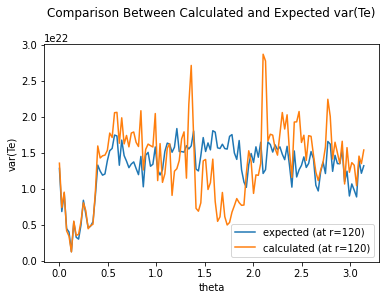

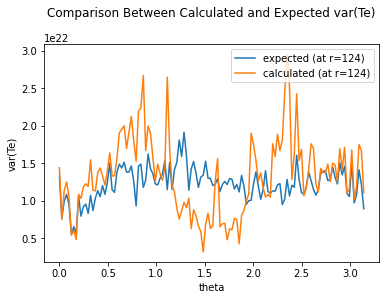

In [28]:
for r in range(0, 128, 4):
    comparison_plot(r, varTe_rh160, varTe_coeff_rh160)

<h3>SANE</h3>

<h5>Rh=1</h5>

In [29]:
# the var(Te) directly calculated from the equation
varTe_sa_file = np.load('sa_rh1_varTe.npy', allow_pickle=True)

In [30]:
# read in coefficients and other variances to calculate var(Te)
# variances
varPg_file = np.load('sa_varPg.npy', allow_pickle=True)
varRHO_file = np.load('sa_varRHO.npy', allow_pickle=True)
varbsq_file = np.load('sa_varbsq.npy', allow_pickle=True)

# averages
sa_avg_Pg = np.load('sa_avgPg.npy', allow_pickle=True)
sa_avg_RHO = np.load('sa_avgRHO.npy', allow_pickle=True)
sa_avg_bsq = np.load('sa_avgbsq.npy', allow_pickle=True)

sa_avgPgRHO = np.load('sa_avgRHOPg.npy', allow_pickle=True)
sa_avgPgbsq = 2*mu*np.load('sa_avgBsqPg.npy', allow_pickle=True)
sa_avgRHObsq = 2*mu*np.load('sa_avgBsqRHO.npy', allow_pickle=True)

# covariances
sa_covPgRHO = sa_avgPgRHO - sa_avg_Pg * sa_avg_RHO
sa_covPgbsq = sa_avgPgbsq - sa_avg_Pg * sa_avg_bsq
sa_covRHObsq = sa_avgRHObsq - sa_avg_RHO * sa_avg_bsq

In [31]:
# coefficients
sa_CPg1 = np.load('sa_CPg1.npy')
sa_Crho1 = np.load('sa_Crho1.npy')
sa_Cbsq1 = np.load('sa_Cbsq1.npy')

In [32]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff = np.square(sa_CPg1)*varPg_file + np.square(sa_Crho1)*varRHO_file + np.square(sa_Cbsq1)*varbsq_file + \
            2*sa_CPg1*sa_Crho1*sa_covPgRHO + 2*sa_CPg1*sa_Cbsq1*sa_covPgbsq + 2*sa_Crho1*sa_Cbsq1*sa_covRHObsq

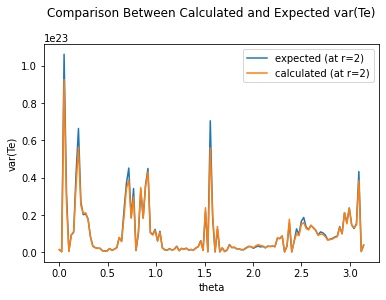

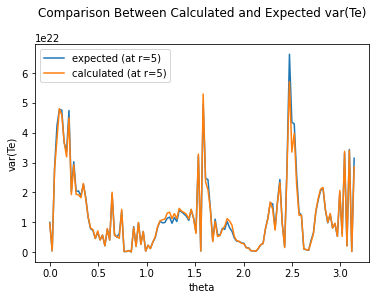

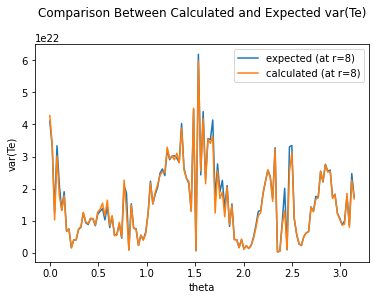

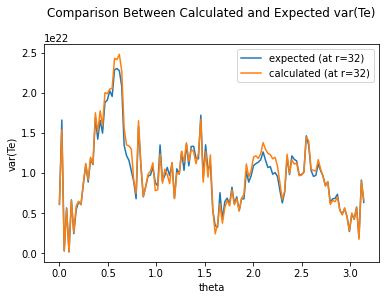

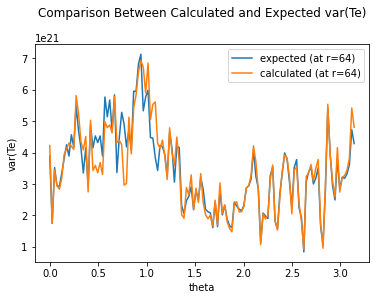

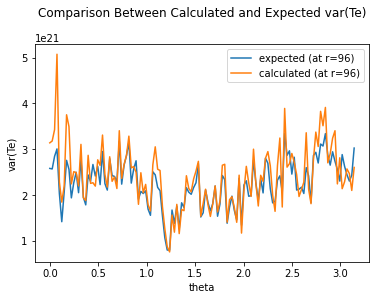

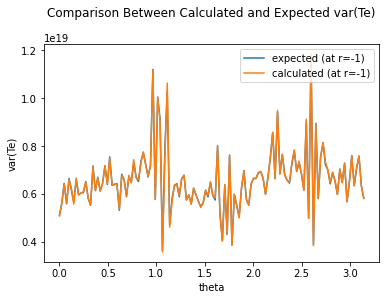

In [33]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_file, varTe_sa_coeff)

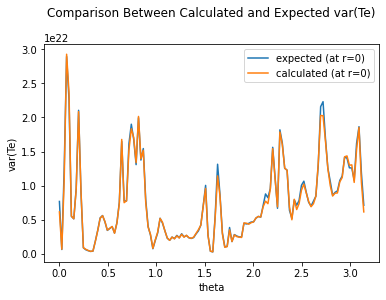

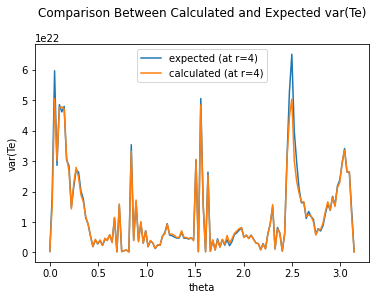

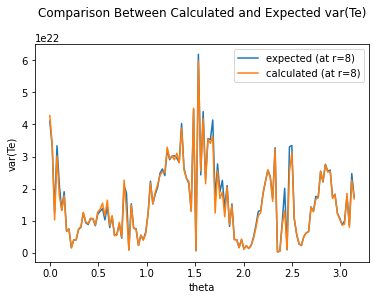

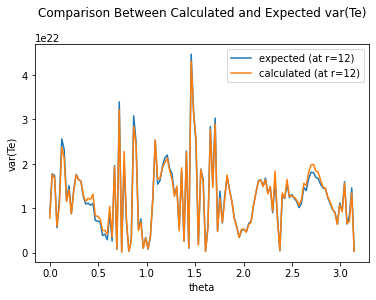

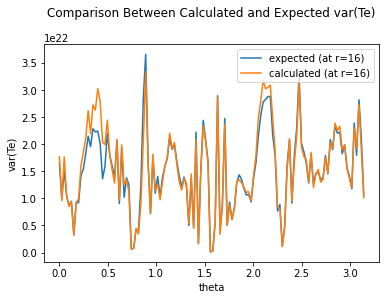

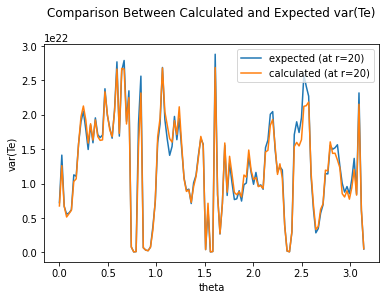

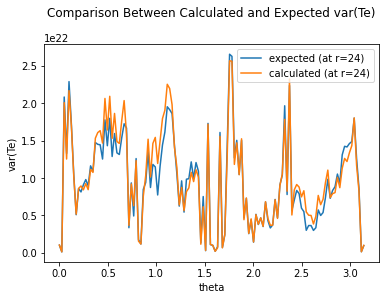

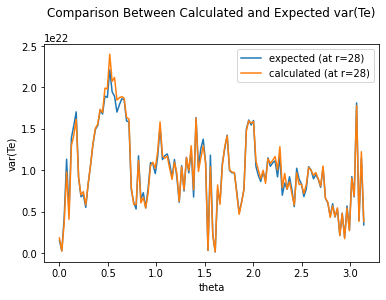

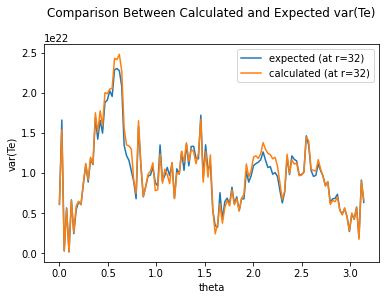

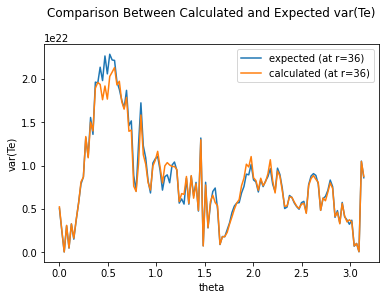

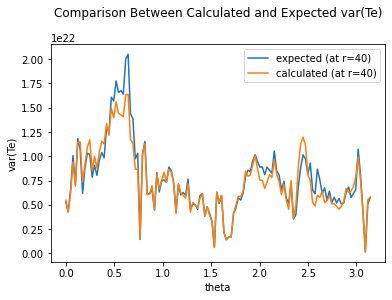

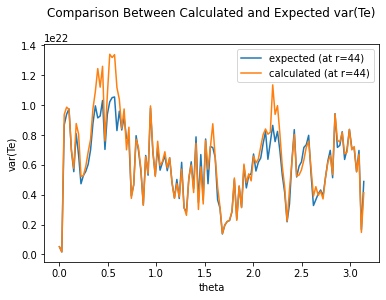

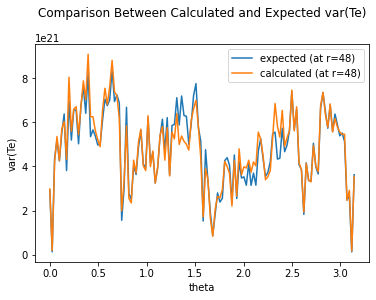

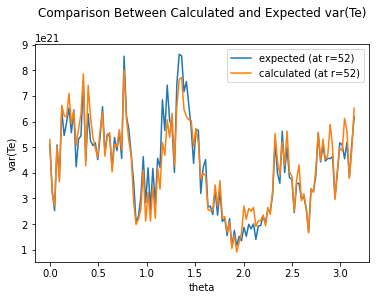

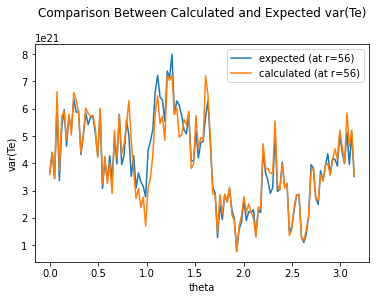

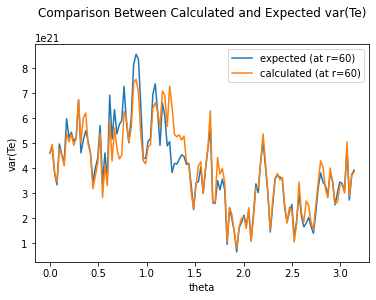

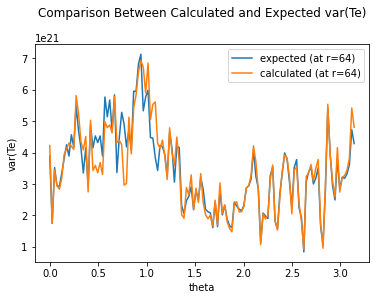

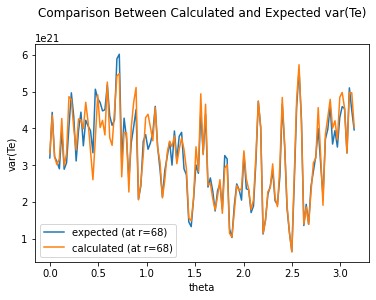

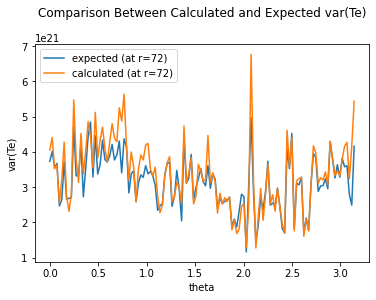

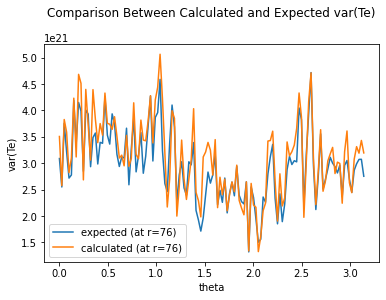

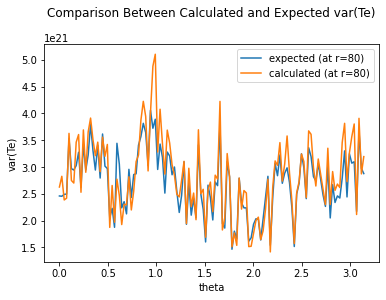

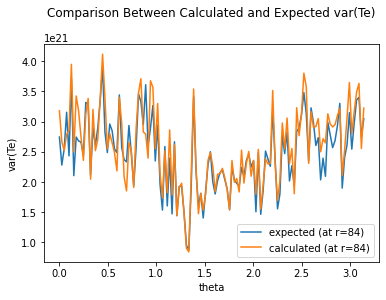

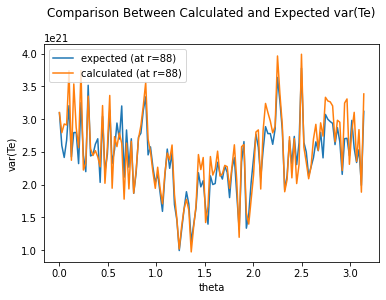

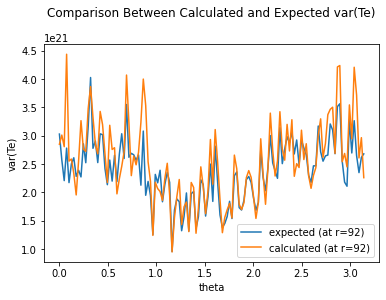

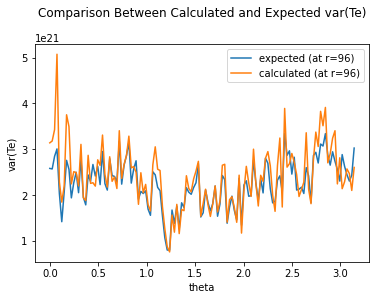

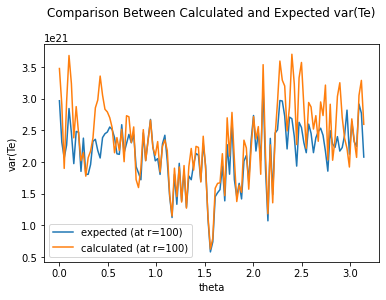

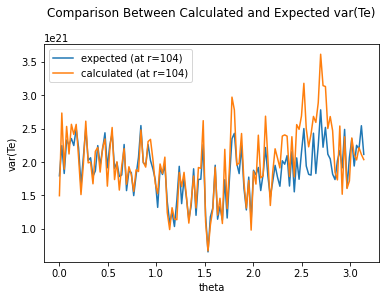

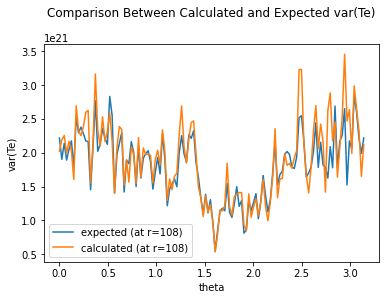

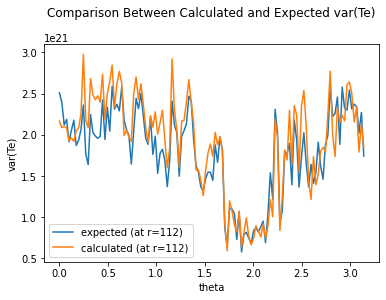

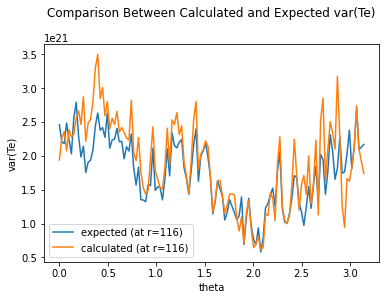

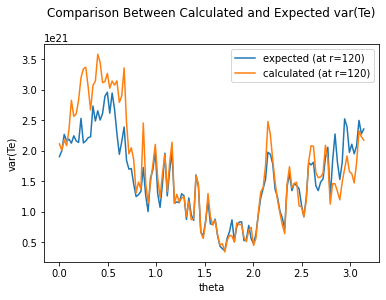

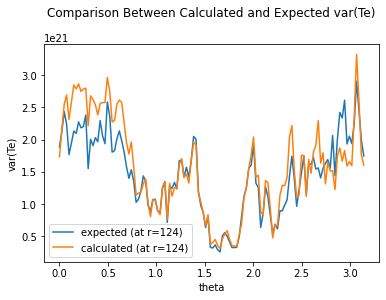

In [34]:
for r in range(0, 128, 4):
    comparison_plot(r, varTe_sa_file, varTe_sa_coeff)

<h5>Rh=160</h5>

In [35]:
# the var(Te) directly calculated
varTe_sa_rh160 = np.load('sa_rh160_varTe.npy', allow_pickle=True)

In [36]:
# coefficients
sa_CPg160 = np.load('sa_CPg160.npy')
sa_Crho160 = np.load('sa_Crho160.npy')
sa_Cbsq160 = np.load('sa_Cbsq160.npy')

In [37]:
# var(Te) caculated from coefficients and variances
varTe_sa_coeff160 = np.square(sa_CPg160)*varPg_file + np.square(sa_Crho160)*varRHO_file + np.square(sa_Cbsq160)*varbsq_file + \
            2*sa_CPg160*sa_Crho160*sa_covPgRHO + 2*sa_CPg160*sa_Cbsq160*sa_covPgbsq + 2*sa_Crho160*sa_Cbsq160*sa_covRHObsq

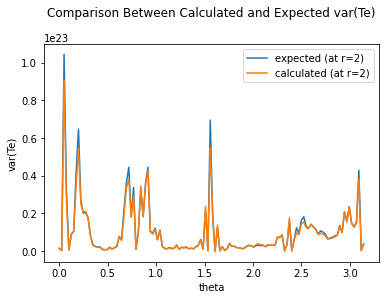

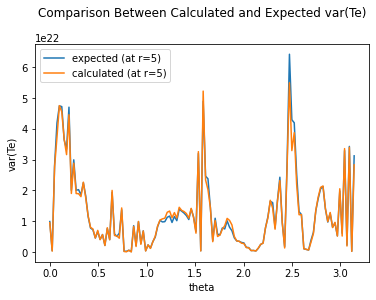

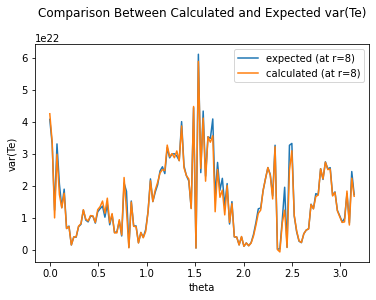

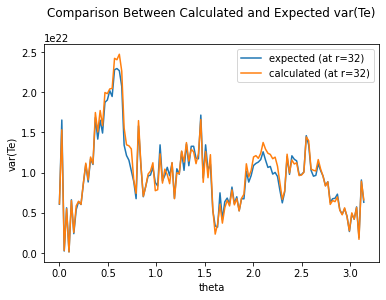

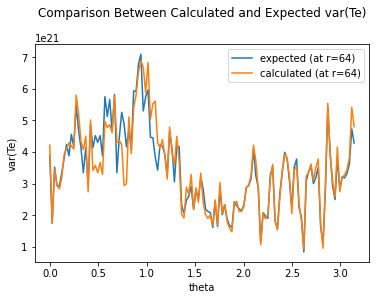

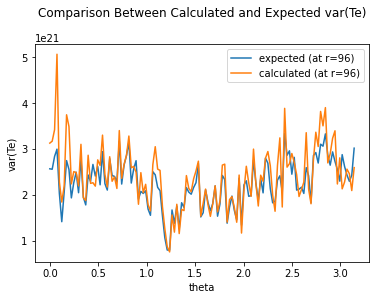

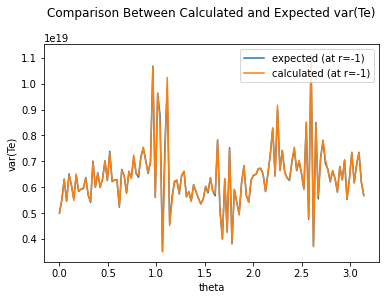

In [38]:
radius_idx = [2, 5, 8, 32, 64, 96, -1]
for r in radius_idx:
    comparison_plot(r, varTe_sa_rh160, varTe_sa_coeff160)

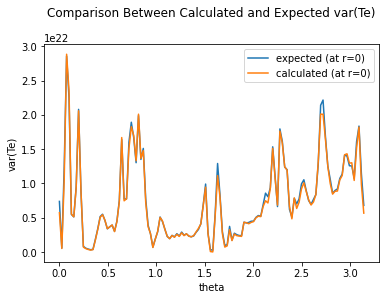

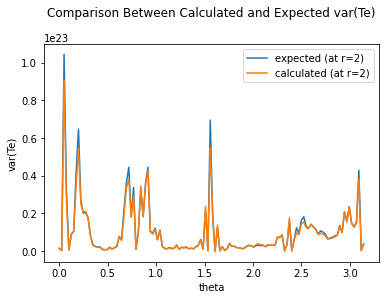

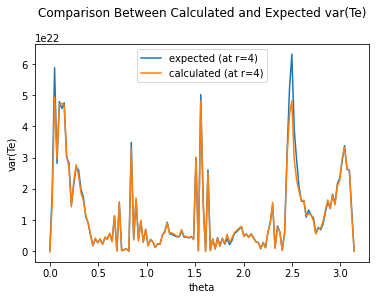

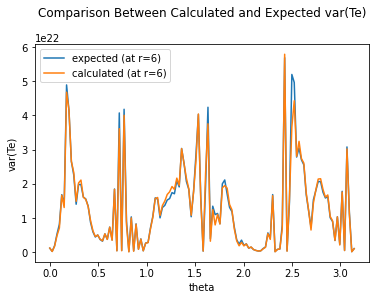

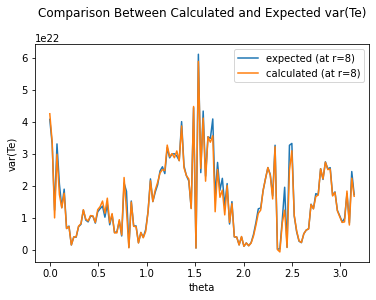

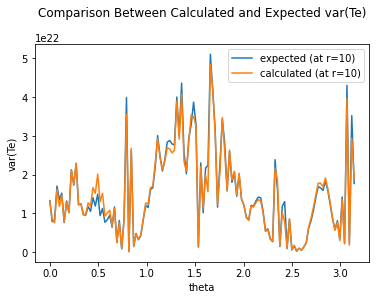

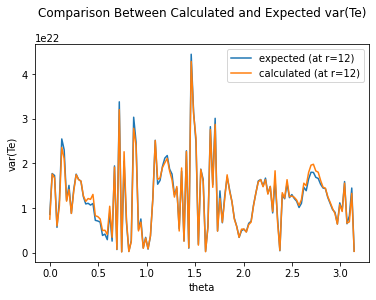

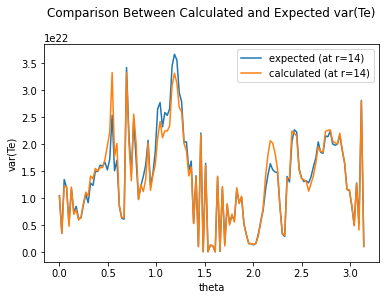

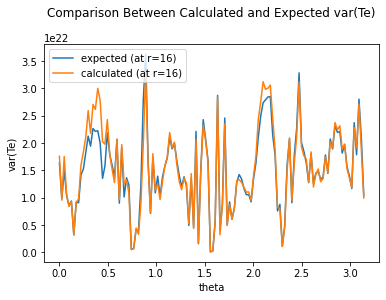

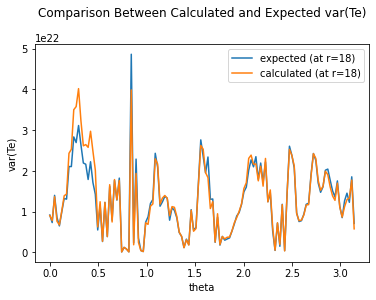

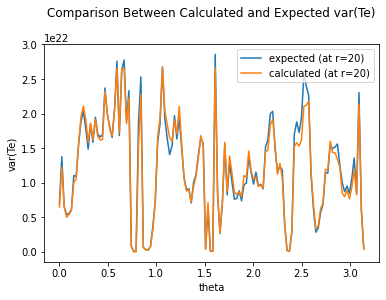

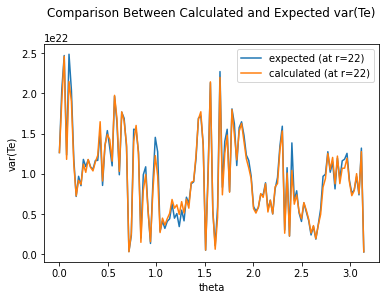

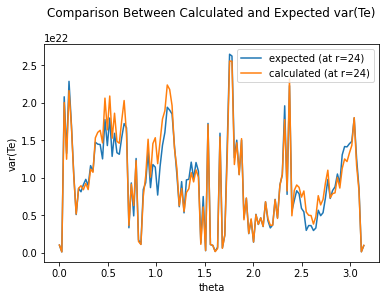

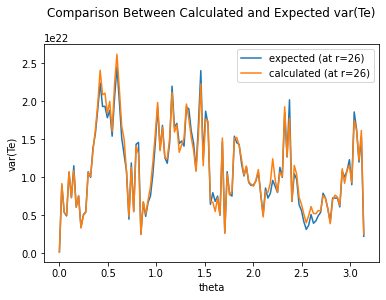

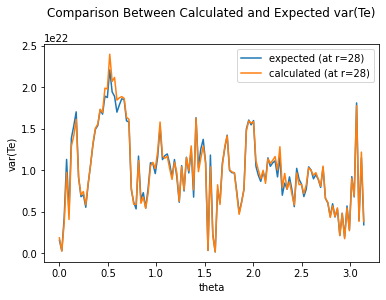

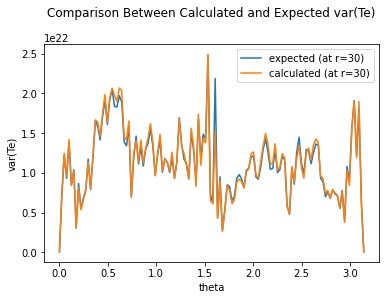

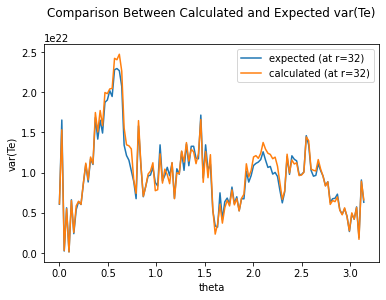

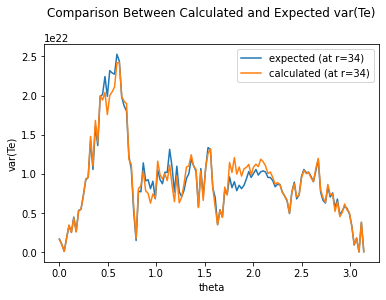

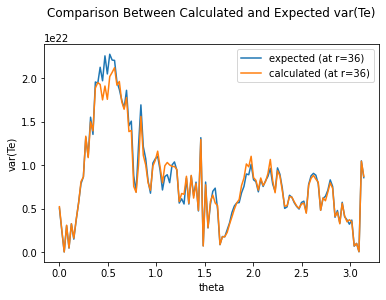

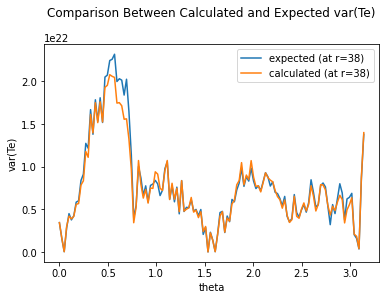

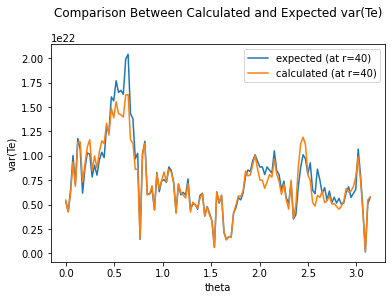

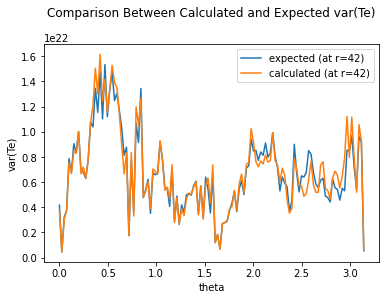

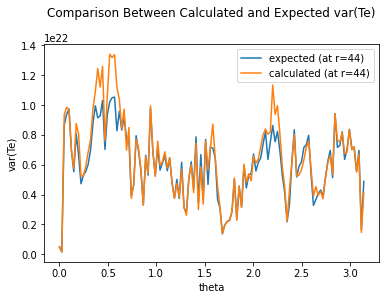

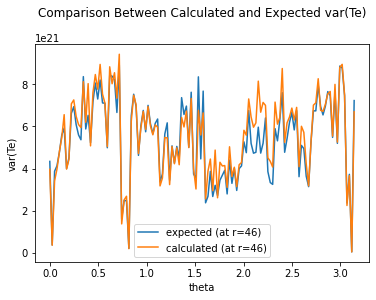

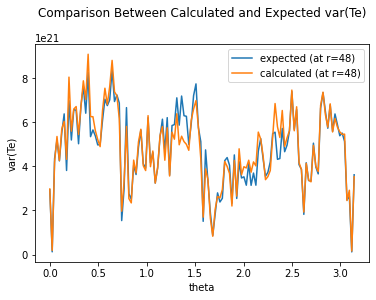

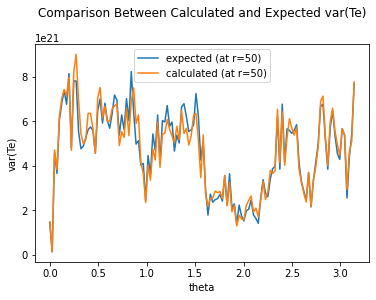

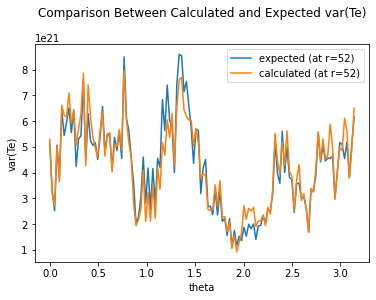

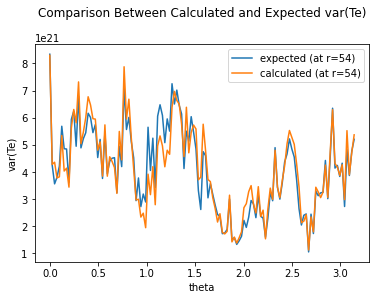

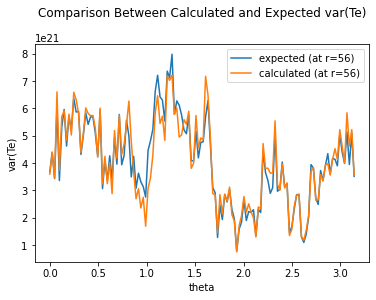

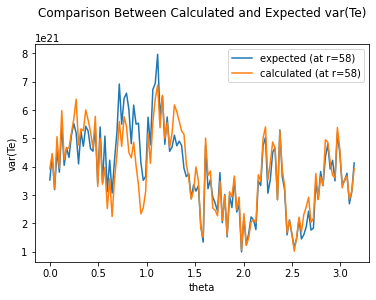

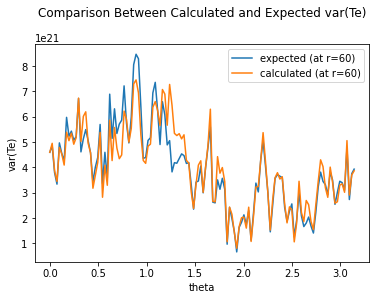

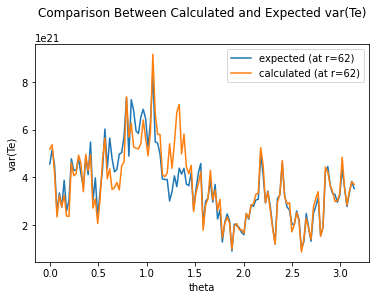

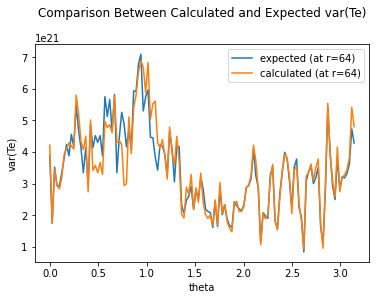

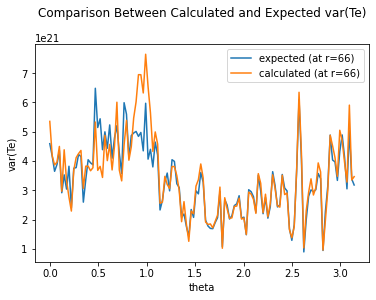

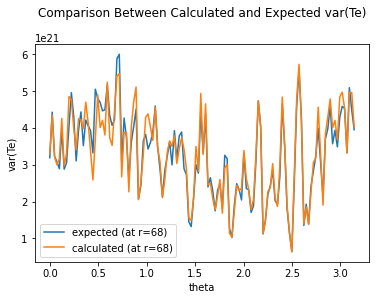

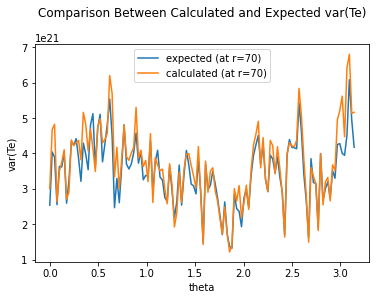

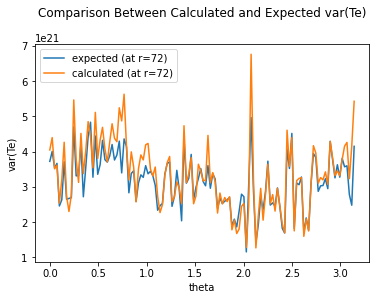

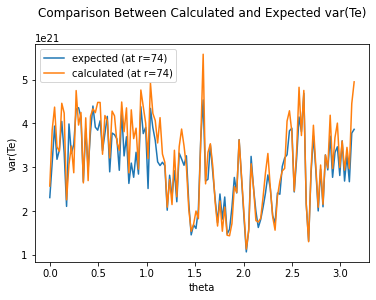

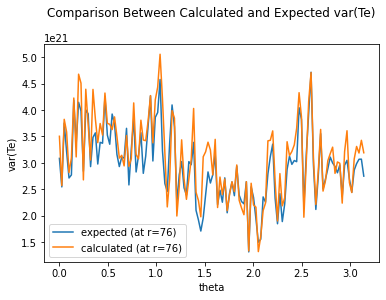

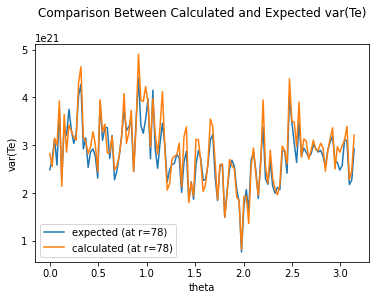

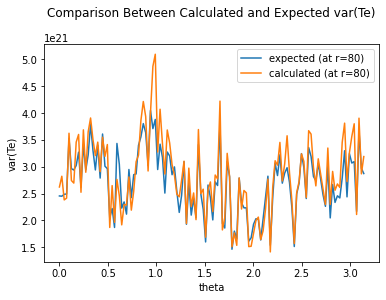

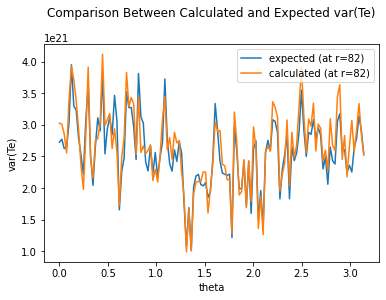

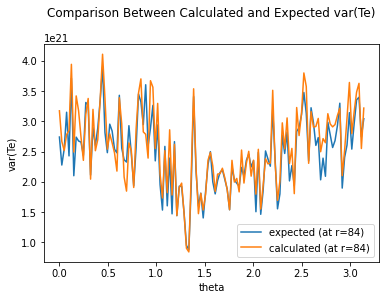

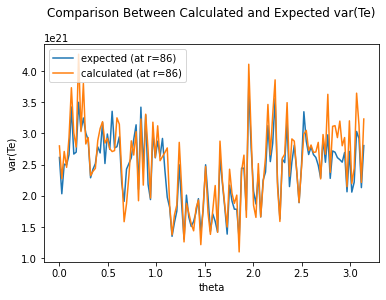

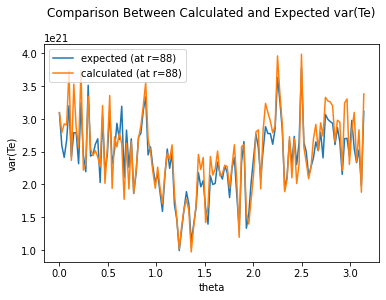

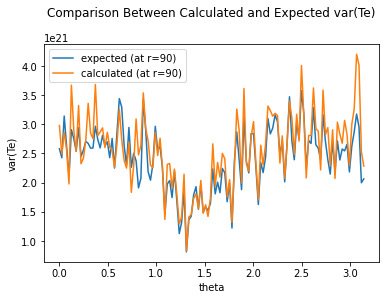

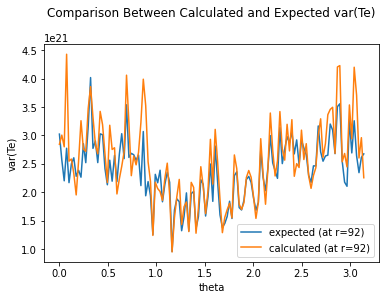

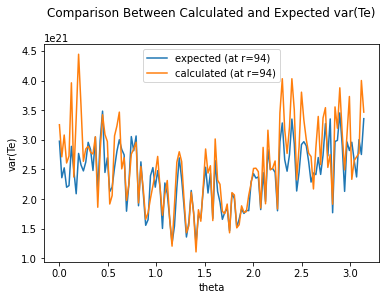

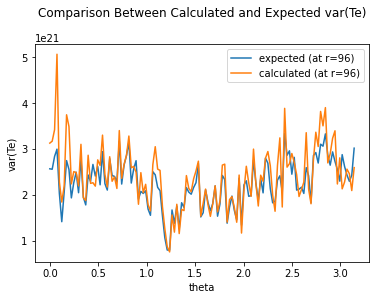

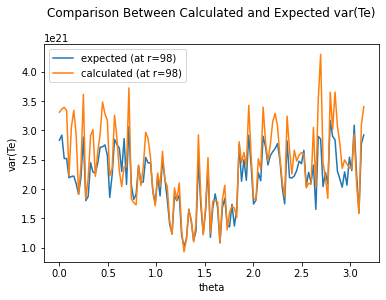

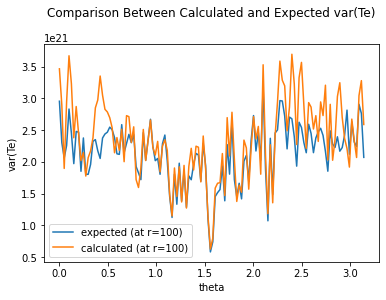

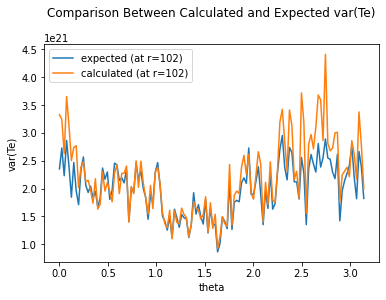

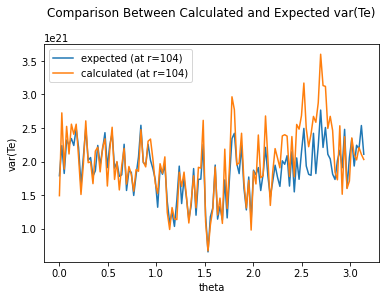

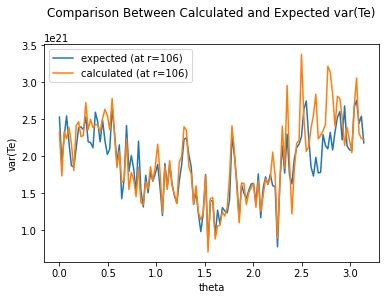

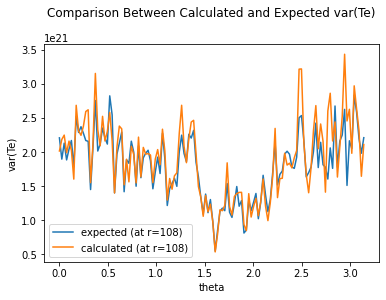

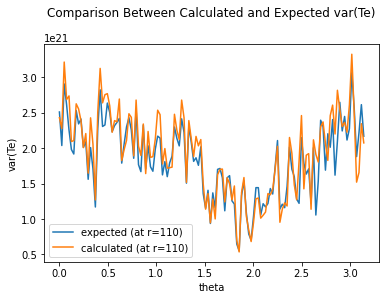

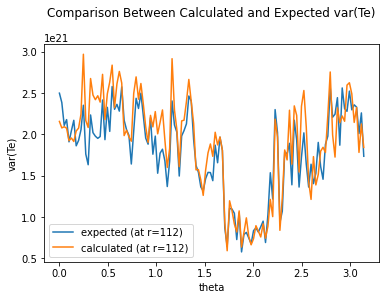

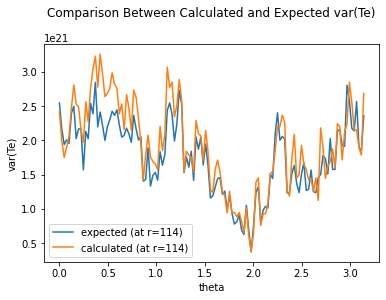

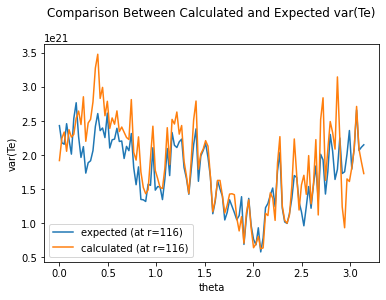

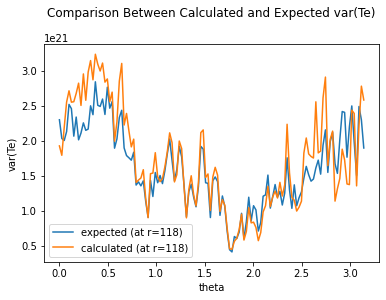

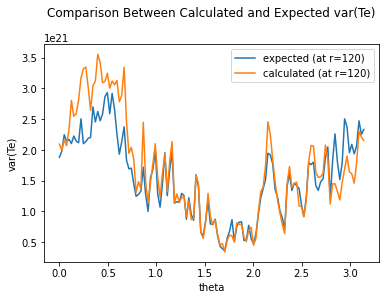

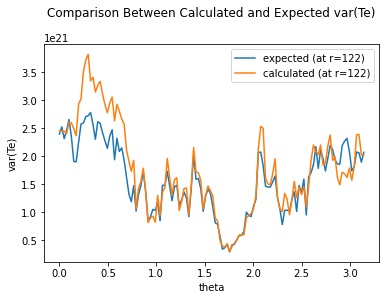

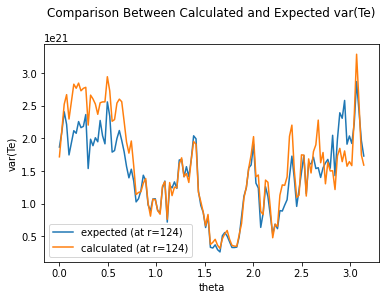

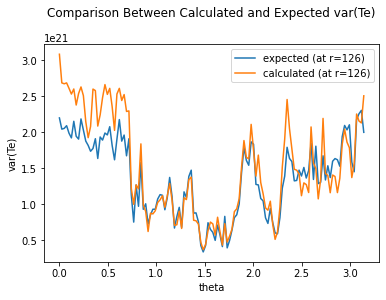

In [39]:
for r in range(0, 128, 2):
    comparison_plot(r, varTe_sa_rh160, varTe_sa_coeff160)

Overall, apparent offset near peaks or $\theta \in [0, \frac{1}{3}\pi] \cup [\frac{2}{3}\pi, \pi]$

### Make some spacial visualizations between var(Te)[expected] and var(Te)[calculated]

<h5>MAD model: along xz</h5>

In [ ]:
dump_ma = pyharm.load_dump(fname(i0, src_ma_5M))

In [ ]:
# for Rh=1
dump_ma.cache['varTe_exp'] = np.load('ma_rh1_varTe.npy', allow_pickle=True)
dump_ma.cache['varTe_cal'] = varTe_coeff

In [ ]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_ma, 'varTe_exp', window=w, vmin=10**14, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_ma, 'varTe_cal', window=w, vmin=10**14, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

In [ ]:
dump_ma_copy = pyharm.load_dump(fname(i0, src_ma_5M))

In [ ]:
# for Rh=160
dump_ma_copy.cache['varTe_exp'] = np.load('ma_rh160_varTe.npy', allow_pickle=True)
dump_ma_copy.cache['varTe_cal'] = varTe_coeff_rh160

In [ ]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_ma_copy, 'varTe_exp', window=w, vmin=10**14, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_ma_copy, 'varTe_cal', window=w, vmin=10**14, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (MAD, Rhigh = 160, gamma=4/3)')
plt.show()

For MAD, the coefficient estimation tends to overestimate the variations in the parts of funnel wall and the funnel itself that are farther away from the center black hole.

<h5>SANE: along xz</h5>

In [ ]:
dump_sa = pyharm.load_dump(fname(i0, src_sa_5M))

In [ ]:
# for Rh=1
dump_sa.cache['varTe_exp'] = np.load('sa_rh1_varTe.npy', allow_pickle=True)
dump_sa.cache['varTe_cal'] = varTe_sa_coeff

In [ ]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_sa, 'varTe_exp', window=w, vmin=10**19, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_sa, 'varTe_cal', window=w, vmin=10**19, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (SANE, Rhigh = 1, gamma=4/3)')
plt.show()

In [ ]:
dump_sa_copy = pyharm.load_dump(fname(i0, src_sa_5M))

In [ ]:
# for Rh=160
dump_sa_copy.cache['varTe_exp'] = np.load('sa_rh160_varTe.npy', allow_pickle=True)
dump_sa_copy.cache['varTe_cal'] = varTe_sa_coeff160

In [ ]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
pplt.plot_xz(axes[0], dump_sa_copy, 'varTe_exp', window=w, vmin=10**19, vmax=3.5*10**22, label='expected')
pplt.plot_xz(axes[1], dump_sa_copy, 'varTe_cal', window=w, vmin=10**19, vmax=3.5*10**22, label='calculated')
plt.suptitle('varTe (SANE, Rhigh = 160, gamma=4/3)')
plt.show()

For SANE, the coefficient estimation also tends to overestimate the variations in the parts of funnel wall and the funnel itself that are farther away from the center black hole.